In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

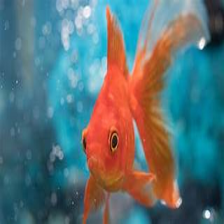

In [5]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [7]:
type(gold_fish)

PIL.Image.Image

In [11]:
gold_fish=np.array(gold_fish)/255.0
type(gold_fish)

numpy.ndarray

In [12]:
gold_fish

array([[[0.00112265, 0.00167628, 0.00207612],
        [0.00106113, 0.00161476, 0.00201461],
        [0.00101499, 0.00156863, 0.00196847],
        ...,
        [0.00075356, 0.00113802, 0.0012303 ],
        [0.00075356, 0.00127643, 0.00133795],
        [0.00078431, 0.00139946, 0.00143022]],

       [[0.00110727, 0.0016609 , 0.00206075],
        [0.00104575, 0.00159938, 0.00199923],
        [0.00098424, 0.00155325, 0.00195309],
        ...,
        [0.00070742, 0.00110727, 0.00119954],
        [0.0007228 , 0.00124567, 0.00130719],
        [0.00076894, 0.0013687 , 0.00139946]],

       [[0.00109189, 0.00164552, 0.00204537],
        [0.00103037, 0.00158401, 0.00198385],
        [0.00095348, 0.00152249, 0.00192234],
        ...,
        [0.00066128, 0.00103037, 0.00113802],
        [0.00067666, 0.0011534 , 0.0012303 ],
        [0.00070742, 0.00129181, 0.00133795]],

       ...,

       [[0.0007228 , 0.0014456 , 0.00172241],
        [0.00066128, 0.00138408, 0.0016609 ],
        [0.00059977, 0

In [13]:
gold_fish[np.newaxis, ...]

array([[[[0.00112265, 0.00167628, 0.00207612],
         [0.00106113, 0.00161476, 0.00201461],
         [0.00101499, 0.00156863, 0.00196847],
         ...,
         [0.00075356, 0.00113802, 0.0012303 ],
         [0.00075356, 0.00127643, 0.00133795],
         [0.00078431, 0.00139946, 0.00143022]],

        [[0.00110727, 0.0016609 , 0.00206075],
         [0.00104575, 0.00159938, 0.00199923],
         [0.00098424, 0.00155325, 0.00195309],
         ...,
         [0.00070742, 0.00110727, 0.00119954],
         [0.0007228 , 0.00124567, 0.00130719],
         [0.00076894, 0.0013687 , 0.00139946]],

        [[0.00109189, 0.00164552, 0.00204537],
         [0.00103037, 0.00158401, 0.00198385],
         [0.00095348, 0.00152249, 0.00192234],
         ...,
         [0.00066128, 0.00103037, 0.00113802],
         [0.00067666, 0.0011534 , 0.0012303 ],
         [0.00070742, 0.00129181, 0.00133795]],

        ...,

        [[0.0007228 , 0.0014456 , 0.00172241],
         [0.00066128, 0.00138408, 0.0016609 ]

In [14]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 2s 2s/step


(1, 1001)

In [15]:
result

array([[-0.18229887, -0.39772022,  0.8107381 , ..., -0.92230177,
        -1.0546076 ,  1.2838535 ]], dtype=float32)

In [17]:
predicted_label_index = np.argmax(result)
predicted_label_index

819

In [19]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

10484/10484 [==============================] - 0s 40us/step


'C:\\Users\\usman\\.keras\\datasets\\ImageNetLabels.txt'

In [24]:
image_labels =[]
with open('ImageNetLabels.txt','r') as f:
    image_labels =f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [26]:
image_labels[predicted_label_index]

'spotlight'

In [28]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [29]:
data_dir

'.\\datasets\\flower_photos'

In [30]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [31]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10555826524_423eb8bf71_n.jpg')]

In [32]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2421


In [33]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [34]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

In [36]:
import PIL

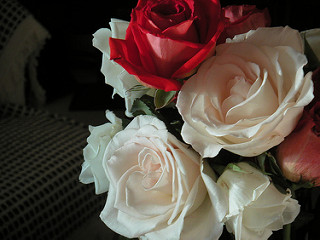

In [37]:
PIL.Image.open(str(roses[1]))

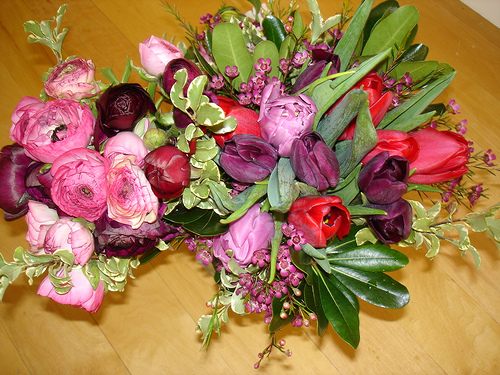

In [40]:
PIL.Image.open(str(tulips[10]))

## Read flowers images from disk into numpy array using opencv

In [43]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))}

In [44]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [45]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [48]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [51]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [52]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [60]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [62]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [63]:
X = np.array(X)
y = np.array(y)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [65]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [66]:
X[0].shape

(224, 224, 3)

In [67]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

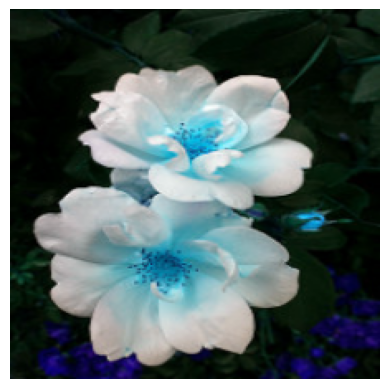

In [68]:
plt.axis('off')
plt.imshow(X[0])

In [69]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [70]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [71]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
57/57 [==============================] - 94s 1s/step - loss: 0.9125 - acc: 0.6353
Epoch 2/5
57/57 [==============================] - 65s 1s/step - loss: 0.4143 - acc: 0.8562
Epoch 3/5
57/57 [==============================] - 69s 1s/step - loss: 0.3237 - acc: 0.8865
Epoch 4/5
57/57 [==============================] - 68s 1s/step - loss: 0.2656 - acc: 0.9196
Epoch 5/5
57/57 [==============================] - 60s 1s/step - loss: 0.2317 - acc: 0.9328
